<a href="https://colab.research.google.com/github/jaugusto/yolo-darknet-opencv/blob/main/multiple_object_detection(YOLO_and_opencv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MULTIPLE OBJECT DETECTION WITH YOLO AND OPENCV**

In [6]:
!pip install opencv-python==4.4.0.40

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import cv2
import numpy as np
import time
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import zipfile

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
path = '/content/gdrive/MyDrive/YOLO_exemplos/YOLO/modelo_YOLOv4.zip'

zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [10]:
labels_path = os.path.sep.join(['/content/cfg', 'coco.names'])
weights_path = os.path.sep.join(['/content/', 'yolov4.weights'])
config_path = os.path.sep.join(['/content/cfg', 'yolov4.cfg'])

LABELS = open(labels_path).read().strip().split('\n')
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype='uint8')

In [11]:
net = cv2.dnn.readNet(config_path, weights_path)

In [12]:
ln = net.getLayerNames()
ln = [ln[i[0] -1] for i in net.getUnconnectedOutLayers()]

In [13]:
def mostrar(img):
  fig = plt.gcf()
  fig.set_size_inches(16, 10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

In [14]:
imagem = cv2.imread('/content/gdrive/MyDrive/YOLO_exemplos/YOLO/imagens/cachorros02.jpg')
imagem_cp = imagem.copy()
(H, W) = imagem.shape[:2]

def redimensionar(imagem, largura_maxima=600):
  if imagem.shape[1] > largura_maxima:
    proporcao = imagem.shape[1] / imagem.shape[0]
    imagem_largura = largura_maxima
    imagem_altura = int(imagem_largura / proporcao)
  else:
    imagem_largura = imagem.shape[1]
    imagem_altura = imagem.shape[0]

  imagem = cv2.resize(imagem, (imagem_largura, imagem_altura))

  return imagem


img_temp = redimensionar(imagem)
img_temp.shape


(400, 600, 3)

In [15]:
def blob_image(net, imagem):
  blob = cv2.dnn.blobFromImage(imagem, 1 / 255.0, (416, 416), swapRB=True, crop=False)
  net.setInput(blob)
  layerOutputs = net.forward(ln)

  return net, imagem, layerOutputs
  

In [16]:
net, imagem, layerOutputs = blob_image(net, imagem)

In [17]:
threshold = 0.5
threshold_NMS = 0.3
confiancas = []
caixas = []
IDclasses = []

In [18]:
def deteccoes(detection, threshold, caixas, confiancas, IDclasses):
  scores = detection[5:]
  classeID = np.argmax(scores)
  confianca = scores[classeID]
  if confianca > threshold:
    caixa = detection[0:4] * np.array([W, H, W, H])
    (centerX, centerY, width, height) = caixa.astype("int")
    x = int(centerX - (width/2))
    y = int(centerY - (height/2))

    caixas.append([x, y, int(width), int(height)])
    confiancas.append(float(confianca))
    IDclasses.append(classeID)
    
  return caixas, confiancas, IDclasses


In [19]:
for output in layerOutputs:
  for detection in output:
    caixas, confiancas, IDclasses = deteccoes(detection, threshold, caixas, confiancas, IDclasses)

In [20]:
objs = cv2.dnn.NMSBoxes(caixas, confiancas, threshold, threshold_NMS)

In [21]:
def funcoes_imagem(imagem, i, confiancas, caixas, COLORS, LABELS, mostrar_texto=True):
  (x, y) = (caixas[i][0], caixas[i][1])
  (w, h) = (caixas[i][2], caixas[i][3])
  cor = [int(i) for i in COLORS[IDclasses[i]]]
  cv2.rectangle(imagem, (x,y), (x+w, y+h), cor, 2)
  texto = "{}: {:.4f}".format(LABELS[IDclasses[i]], confiancas[i])
  if mostrar_texto:
    print(">" + texto)
    print(x,y,w,h)
  cv2.putText(imagem, texto,  (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, cor, 2)
  return imagem, x, y, w, h

>dog: 0.9928
435 260 348 449


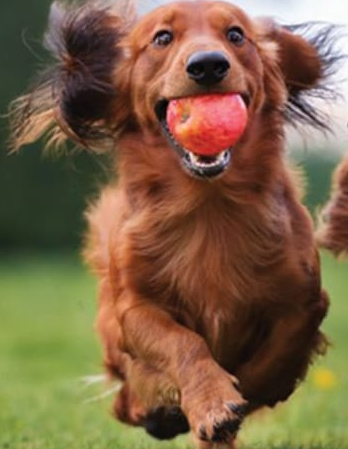

>dog: 0.9902
751 325 241 396


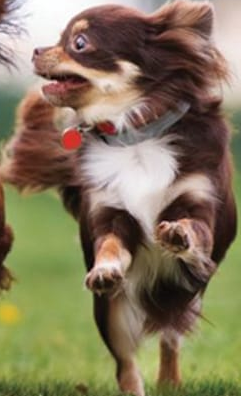

In [22]:
if len(objs)>0:
  for i in objs.flatten():
    imagem, x, y, w, h = funcoes_imagem(imagem, i, confiancas, caixas, COLORS, LABELS)
    objeto = imagem_cp[y:y+h, x:x+w]
    cv2_imshow(objeto)


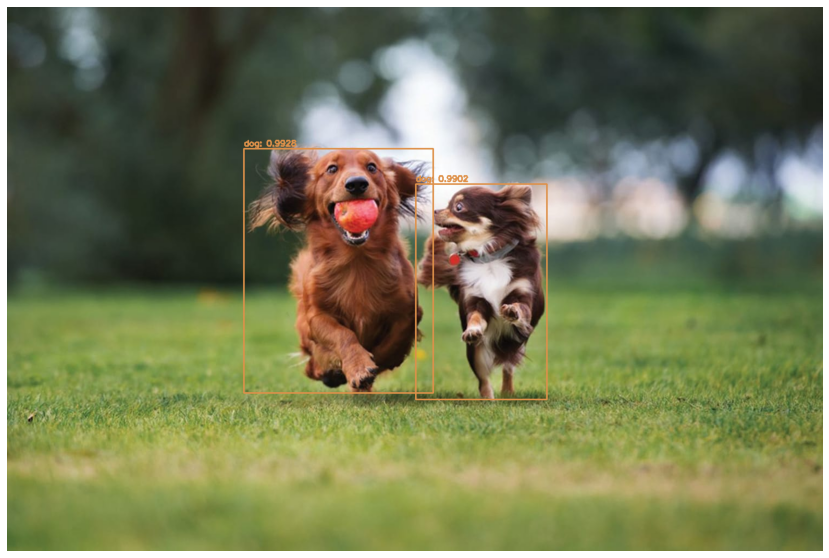

In [23]:
mostrar(imagem)


**DETECT OBJECTS IN MULTIPLES IMAGES**

In [24]:
path = '/content/gdrive/MyDrive/YOLO_exemplos/YOLO/imagens/fotos_teste.zip'

zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

>cup: 0.9939
90 245 171 164


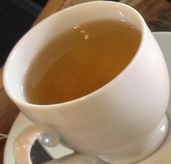

>cup: 0.9924
481 149 154 184


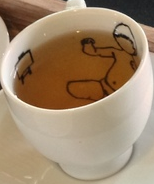

>cup: 0.9905
284 341 197 196


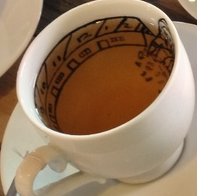

>cup: 0.9848
546 488 225 281


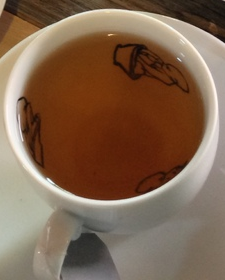

>cup: 0.9779
286 95 143 156


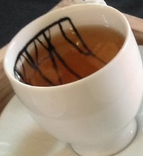

>diningtable: 0.9470
35 6 971 770


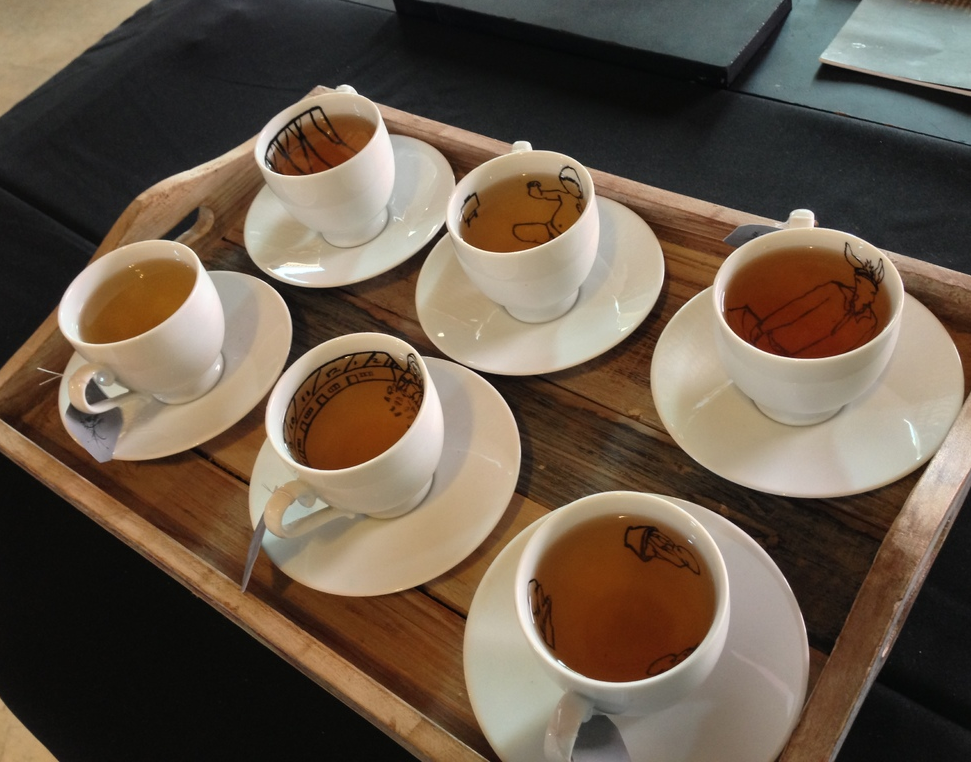

>cup: 0.8987
738 231 199 201


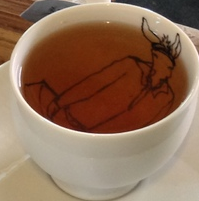

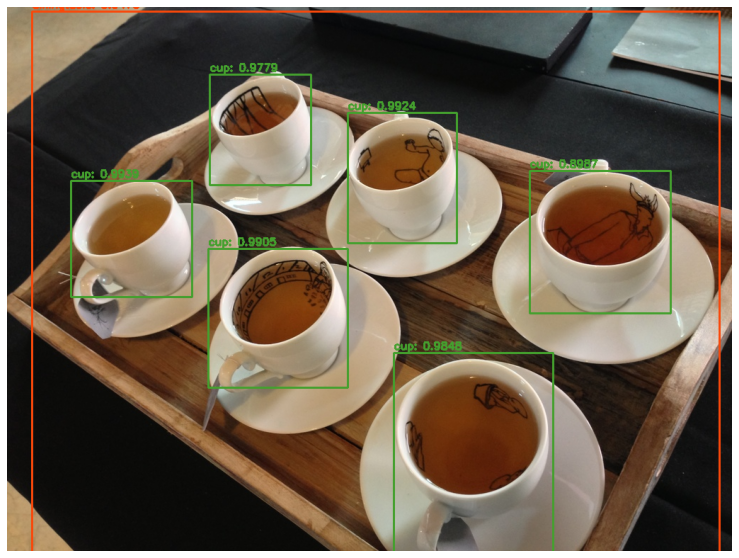

total de cachorros: 0
>person: 0.9983
192 95 82 275


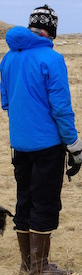

>dog: 0.9948
61 263 142 82


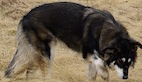

>horse: 0.9935
406 138 191 207


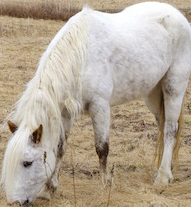

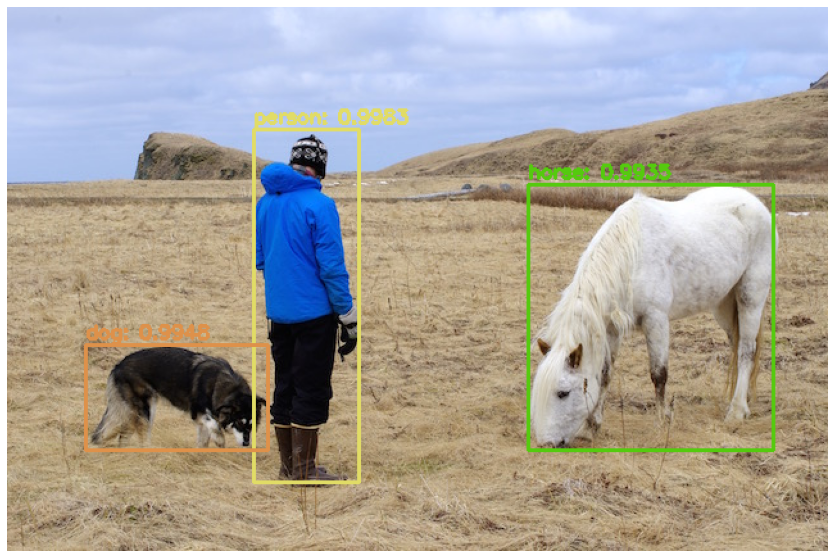

total de cachorros: 1
>cat: 0.9732
191 115 341 329


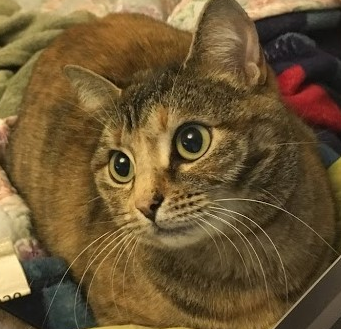

>laptop: 0.5356
392 95 213 456


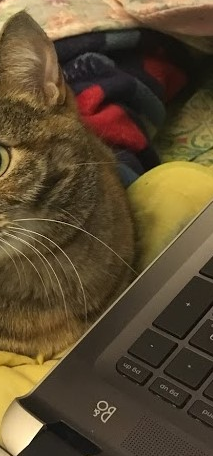

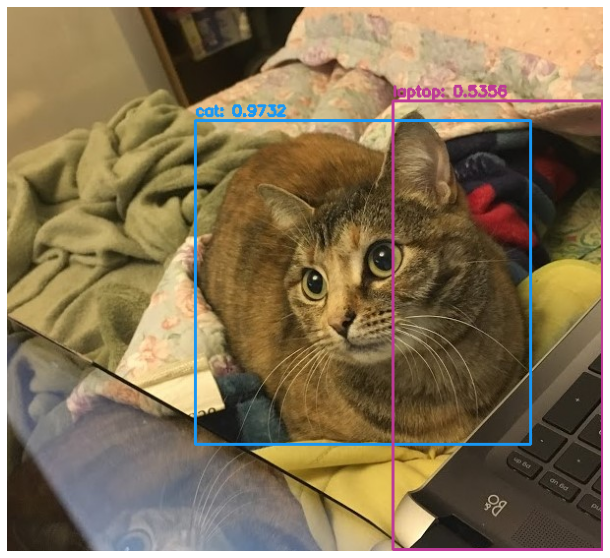

total de cachorros: 1
>dog: 0.9869
280 173 228 420


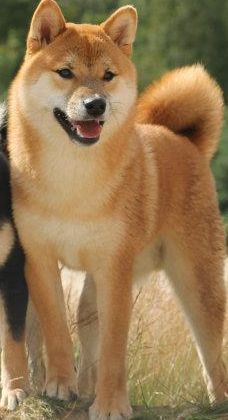

>dog: 0.9824
504 207 230 406


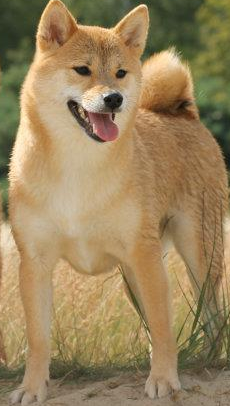

>dog: 0.9767
142 208 178 391


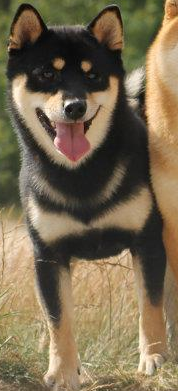

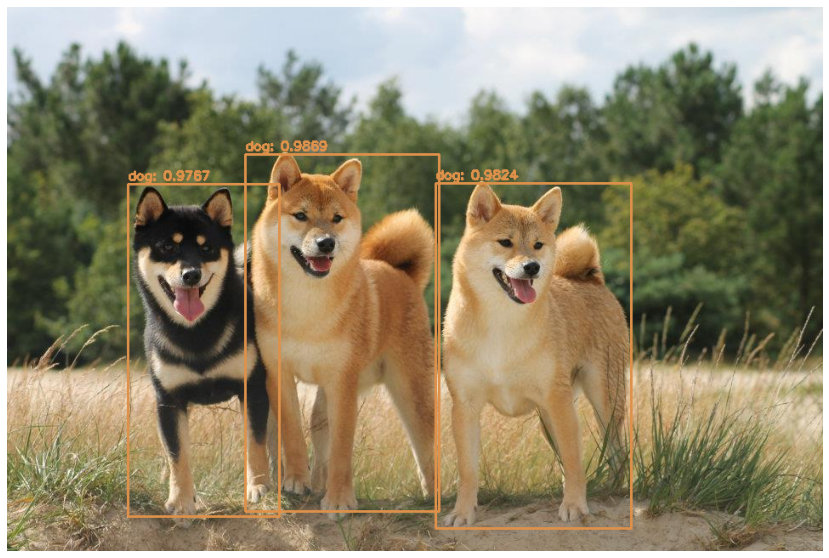

total de cachorros: 4
>cat: 0.9387
-2 171 387 458


error: ignored

In [26]:
diretorio_fotos = [os.path.join('fotos_teste', i) for i in os.listdir('fotos_teste')]

count_total = 0

for imagem_path in diretorio_fotos:

  try:
    imagem = cv2.imread(imagem_path)
    imagem_cp = imagem.copy()
    (H, W) = imagem.shape[:2]
  except:
    print('Erro leitura do arquivo' + imagem_path)
    continue

  redimensionar(imagem)

  net, imagem, layerOutputs = blob_image(net, imagem)

  threshold = 0.5
  threshold_NMS = 0.3
  confiancas = []
  caixas = []
  IDclasses = []

  for output in layerOutputs:
    for detection in output:
      caixas, confiancas, IDclasses = deteccoes(detection, threshold, caixas, confiancas, IDclasses)
  objs = cv2.dnn.NMSBoxes(caixas, confiancas, threshold, threshold_NMS)

  if len(objs)>0:
    for i in objs.flatten():

      if LABELS[IDclasses[i]] == 'dog':
        count_total +=1

      imagem, x, y, w, h = funcoes_imagem(imagem, i, confiancas, caixas, COLORS, LABELS)
      objeto = imagem_cp[y:y+h, x:x+w]
      cv2_imshow(objeto)

  mostrar(imagem)
  print('total de cachorros: ' + str(count_total))